# Matrix Computing

### A physical problem: static equilibrium of two masses

![image](Figs/Fig6_1.png) 

**Figure 6.1** Two weights connected by three
pieces of string and suspended from a horizontal bar of length *L*. The
lengths are all known, but the angles and the tensions in the strings
are to be determined.

## N-D Newton-Raphson; Two Masses on a String<a id="6.1"></a>


**Problem:** Two weights (*W*<sub>1</sub>, *W*<sub>2</sub>)=(10, 20) are
hung from three pieces of string with lengths
(*L*<sub>1</sub>, *L*<sub>2</sub>, *L*<sub>3</sub>)=(3, 4, 4) and a
horizontal bar of length *L* = 8 (Figure 6.1). Find the angles assumed
by the strings and the tensions exerted by the strings.

In spite of the fact that this is a simple problem requiring no more
than first-year physics to formulate, the coupled transcendental
equations that result are just about inhumanely painful to solve
analytically\[*Note:* Almost impossible anyway, as L. Molnar has
supplied me with an analytic solution.\]. However, we will show you how
the computer can solve this problem, but even then only by a
trial-and-error technique with no guarantee of success. Your **problem**
is to test this solution for a variety of weights and lengths and then
to extend it to the three-weight problem (not as easy as it may seem).
In either case check the physical reasonableness of your solution; the
deduced tensions should be positive and similar in magnitude to the
weights of the spheres, and the deduced angles should correspond to a
physically realizable geometry, as confirmed with a sketch such as
Figure 2.2 B. Some of the exploration you should do is to see at what
point your initial guess gets so bad that the computer is unable to find
a physical solution.

![image](Figs/Fig6_2.png)

**Figure 6.2** A free body diagram for one
weight in equilibrium. Balancing the forces in the *x* and *y*
directions for all weights leads to the equations of static equilibrium.

###   Theory: Statics<a id="6.1.1"></a>

We start with the geometric constraints that the horizontal length of the
structure is *L* and that the strings begin and end at the same height
(Figure 6.1):[[xml]](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/xml/6.1.xml)

$$\begin{align}
\tag*{6.1}
L_1\cos\theta_{1} + L_2\cos\theta_{2}+ L_3\cos\theta_{3} & = L,\\
L_1\sin\theta_{1} + L_2\sin\theta_{2} -L_3\sin\theta_{3} & = 0,\tag*{6.2}\\
\sin^2\theta_1+\cos^2\theta_1 & =  1,\tag*{6.3}\\
\sin^2\theta_2+\cos^2\theta_2 & =  1,\tag*{6.4}\\
\sin^2\theta_3+\cos^2\theta_3 & =  1.\tag*{6.5}\end{align}$$

Observe that the last three equations include trigonometric identities as
independent equations because we are treating sin*θ* and cos*θ* as
independent variables; this makes the search procedure easier to implement.
The basics physics says that because there are no accelerations, the sum of the
forces in the horizontal and vertical directions must equal zero (Figure 6.2):

$$\begin{align} T_{1}\sin\theta_{1} - T_{2}\sin\theta_{2} - W_{1} & =
0,\tag*{6.6}\\ T_{1}\cos\theta_{1} - T_{2}\cos\theta_{2} & = 0,\tag*{6.7}\\
T_{2}\sin\theta_{2} + T_{3}\sin\theta_{3} - W_{2} & = 0,\tag*{6.8}\\
T_{2}\cos\theta_{2} - T_{3}\cos\theta_{3} & = 0.\tag*{6.9}\end{align}$$

 Here *W*<sub>*i*</sub> is the weight of mass *i* and *T*<sub>*i*</sub>
is the tension in string *i*. Note that because we do not have a rigid
structure, we cannot assume the equilibrium of torques.

###  Algorithm: Multidimensional Searching<a id="6.1.2"></a>

Equations (6.1)-(6.9) are nine simultaneous nonlinear equations. While
linear equations can be solved directly, nonlinear equations cannot. You can use the computer to *search* for a solution by guessing, but there is no guarantee of finding one.

Before we look for the algorithm that will help us solve this problem let's do some manipulations to recast our equation in a simpler form (amenable tocomutation). We can map the problem into a single equation
by renaming the nine unknown angles and tensions as the
subscripted variable *y*<sub>*i*</sub> and placing the variables
together as a vector:

$$\tag*{6.10}
\vec{y} =\begin{pmatrix}
x_{1} \\ x_{2} \\ x_{3} \\ x_{4} \\ x_{5} \\ x_6 \\ x_{7}\\ x_{8}
\\ x_9
\end{pmatrix} =\begin{pmatrix}
\sin\theta_{1} \\
\sin\theta_{2}\\
\sin\theta_{3} \\
\cos\theta_{1} \\
\cos\theta_2 \\
\cos\theta_3 \\
T_1 \\ T_{2}\\ T_3
\end{pmatrix}.$$

The nine equations to be solved are written in a general form with zeros
on the right-hand sides and placed in a vector:

$$\begin{align}
\tag*{6.11}
f_i (x_1, x_2,\ldots, x_N) & = 0,\quad i=1, N,\\
\vec{f}(\vec{y}) =\begin{pmatrix}
f_{1}(\vec{y})\\ f_{2}(\vec{y}) \\ f_3(\vec{y})\\ f_4(\vec{y})\\ f_5(\vec{y})\\
f_6(\vec{y})\\ f_7(\vec{y})\\ f_8(\vec{y})\\ f_{9}(\vec{y})
\end{pmatrix}  & =\begin{pmatrix}
3 x_4 + 4 x_5 + 4x_6 -8 \\
 3 x_1 + 4 x_2 - 4 x_3  \\
 x_7 x_1 - x_8 x_2  -10 \\
 x_7 x_4 - x_8 x_5   \\
 x_8 x_2 + x_9 x_3 -20 \\
x_8 x_5 - x_9 x_6\\ x_1^2 + x_4^2 -1 \\ x_{2}^2 + x_5^2 - 1 \\ x_3^2 + x_6^2 -1
\end{pmatrix}
 = \vec{0}.\tag*{6.12}\end{align}$$

The solution to these equations requires a set of nine *x*<sub>*i*</sub> values
that make all nine *f*<sub>*i*</sub>’s vanish simultaneously. Although these
equations are not very complicated (the physics after all is elementary), the
terms quadratic in *x* make them nonlinear, and this makes it hard or
impossible to find an analytic solution. The search algorithm guesses a solution,
expands the nonlinear equations into linear form, solves the resulting linear
equations, and continues to improve the guesses based on how close the
previous one was to making $\vec{f} =0$.

## Algorithm: Trial-and-Error Roots via Bisection<a id="7.2"></a>

Trial-and-error root finding looks for a value of *x* for which $$\tag*{7.4} f(x)
\simeq 0,$$

where the 0 on the right-hand side (RHS) is conventional (an equation
such as 10sin*x* = 3*x*<sup>3</sup> can easily be written as
10sin*x* − 3*x*<sup>3</sup> = 0). The search procedure starts with a
guessed value for *x*, substitutes that guess into *f*(*x*) (the
“trial”), and then sees how far the LHS is from zero (the “error”). The
program then changes *x* based on the error and tries out the new guess
in *f*(*x*). The procedure continues until *f*(*x*)≃0 to some desired
level of precision, or until the changes in *x* are insignificant, or if
the search seems endless.

The most elementary trial-and-error technique is the *bisection
algorithm*. It is reliable but slow. If you know some interval in which
*f*(*x*) changes sign, then the bisection algorithm will always converge
to the root by finding progressively smaller and smaller intervals
within which the zero lies. Other techniques, such as the Newton-Raphson
method we describe next, may converge more quickly, but if the initial
guess is not close, it may become unstable and fail completely.

The basis of the bisection algorithm is shown in Figure 7.1. We start
with two values of *x* between which we know a zero occurs. (You can
determine these by making a graph or by stepping through different *x*
values and looking for a sign change.) To be specific, let us say that
*f*(*x*) is negative at *x*<sub>−</sub> and positive at *x*<sub>+</sub>:

$$\tag*{7.5}
    f(x_-) \lt; 0, \quad f(x_+) \gt; 0.$$

(Note that it may well be that *x*<sub>−</sub> &gt; *x*<sub>+</sub> if
the function changes from positive to negative as *x* increases.) Thus
we start with the interval *x*<sub>+</sub> ≤ *x* ≤ *x*<sub>−</sub>
within which we know a zero occurs. The algorithm (implemented in
`Bisection.py`) then picks the new *x* as the bisection of the interval
and selects as its new interval the half in which the sign change
occurs:

       x = ( xPlus + xMinus ) / 2
       if ( f(x) f(xPlus) > 0 ) xPlus = x
        else xMinus = x


This process continues until the value of *f*(*x*) is less than a
predefined level of precision or until a predefined (large) number of
subdivisions occurs.

[ **Listing 7.1 .py**](http://www.science.oregonstate.edu/~rubin/Books/CPbook/Codes/PythonCodes/Bisection.py) is a simple implementation of the bisection
algorithm for finding a zero of a function, in this case
2cos*x* − *x*.

The example in Figure 7.1 shows the first interval extending from
*x*<sub>−</sub> = *x*<sub>+1</sub> to
*x*<sub>+</sub> = *x*<sub>−1</sub>. We bisect that interval at *x*, and
because *f*(*x*)&lt;0 at the midpoint, we set
*x*<sub>−</sub> ≡ *x*<sub>−2</sub> = *x* and label it *x*<sub>−2</sub>
to indicate the second step. We then use
*x*<sub>+2</sub> ≡ *x*<sub>+1</sub> and *x*<sub>−2</sub> as the next
interval and continue the process. We see that only *x*<sub>−</sub>
changes for the first three steps in this example, but that for the
fourth step *x*<sub>+</sub> finally changes. The changes then become too
small for us to show.

![image](Figs/Fig7_1.png)

**Figure 7.1** A graphical representation of the steps involved in solving for a
zero of *fx* using the bisection algorithm. The bisection algorithm takes the
midpoint of the interval as the new guess for *x*, and so each step reduces the
interval size by one-half. Four steps are shown for the algorith

In [2]:
# Bisection.py, Notebook Version

from __future__ import  print_function
from numpy import *

def f(x):                                      # Function
    return 2*cos(x)-x

def bisection(xminus,xplus,Nmax,eps):          # x-,x+ Nmax error
    for it in range(0,Nmax):
        x=(xminus+xplus)/2                     # Mid point
        print("it ",it, " x ", x, " f(x) ",f(x))
        if (f(xplus)*f(x))>0:                      # Root in other half
            xplus=x                            # Change x+ to x
        else:
            xminus=x                           # Change x- to x
        if(xplus-xminus<eps):                           # Converged?
            print("\n root found with precision eps = ",eps)
            break
        if it==Nmax-1:
             print("\n root not found after Nmax iterations ")   
    return x  

eps=1e-12
a=0.0
b=7.0
Nmax=100
root=bisection(a,b,Nmax,eps)
print("Root =",root)

it  0  x  3.5  f(x)  -5.372913374581593
it  1  x  1.75  f(x)  -2.106492111298984
it  2  x  0.875  f(x)  0.4069937163266504
it  3  x  1.3125  f(x)  -0.8016324662223766
it  4  x  1.09375  f(x)  -0.1754354562153918
it  5  x  0.984375  f(x)  0.12239260297994425
it  6  x  1.0390625  f(x)  -0.025005422765343788
it  7  x  1.01171875  f(x)  0.049090138545859086
it  8  x  1.025390625  f(x)  0.012139324014991182
it  9  x  1.0322265625  f(x)  -0.006409081221774748
it  10  x  1.02880859375  f(x)  0.002871147695383325
it  11  x  1.030517578125  f(x)  -0.0017674644655767402
it  12  x  1.0296630859375  f(x)  0.0005522177242860415
it  13  x  1.03009033203125  f(x)  -0.0006075294101504092
it  14  x  1.029876708984375  f(x)  -2.7632344450800872e-05
it  15  x  1.0297698974609375  f(x)  0.0002622985655824639
it  16  x  1.0298233032226562  f(x)  0.00011733457935148017
it  17  x  1.0298500061035156  f(x)  4.485148463029276e-05
it  18  x  1.0298633575439453  f(x)  8.609661882763575e-06
it  19  x  1.029870033

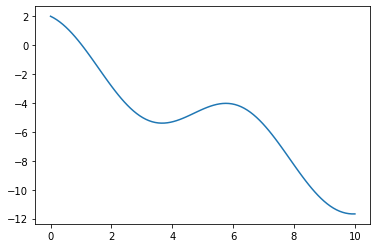

In [5]:
import matplotlib.pyplot as plt
import numpy as np 

x=linspace(0,10,100)
y=0*x
plt.plot(x,)
plt.plot(x,f(x))

## Problem: A Search for Quantum States in a Box<a id="7.1"></a>

Many computer techniques are well-defined sets of procedures leading to
definite outcomes. In contrast, some computational techniques are
trial-and-error in which decisions on what path to follow are made based
on the current values of variables, and the program quits only when it
thinks it has solved the problem. (We already did some of this when we
summed a power series until the terms became small.) Writing this type
of program is usually interesting because we must foresee how to have
the computer act intelligently in all possible situations, and running
them is very much like an experiment in which it is hard to predict what
the computer will come up with.

**Problem:** Probably the most standard problem in quantum
mechanics is to solve for the energies of a particle
of mass *m* bound within a 1-D square well of radius *a*:

$$\tag*{7.1}
    V(x) =\begin{cases}
    -V_0, & \mbox{for } |x| \leq a,    \\
  0, & \mbox{for }  |x| \geq a.
  \end{cases}$$
  
\[*Note:* We solve this same problem in § 9.1 using an approach
that is applicable to almost any potential and which also provides the
wave functions. The approach of this section works only for the eigen
energies of a square well.\]
As shown in quantum mechanics texts \[[Wikipedia](https://en.wikipedia.org/wiki/Finite_potential_well)\], the energies of
the bound states *E* = −*E*<sub>*B*</sub> &lt; 0 within this well are
solutions of the transcendental equations

$$\begin{align}
 \tag*{7.2}
\sqrt{V_0-E_B}  \tan\left(\sqrt{V_0-E_B}\right) & =  \sqrt{E_B}
\quad
\mbox{(even)},\\
\sqrt{V_0-E_B}\ \ \mbox{cotan}\left(\sqrt{V_0-E_B}\right)& =
\sqrt{E_B}\quad \mbox{(odd)},\tag*{7.3}\end{align}$$

where even and odd refer to the symmetry of the wave function. Here we
have chosen units such that ℏ = 1, 2*m* = 1, *a* = 1, and
*V*<sub>0</sub> can be chosen to be any positive number. Your **problem** is to

1.  Find several bound-state energies *E*<sub>*B*</sub> for even wave
    functions, that is, the solution of (7.2).

2.  See if making the potential deeper, say, by changing the 10 to a 20
    or a 30, produces a larger number of, or deeper, bound states.



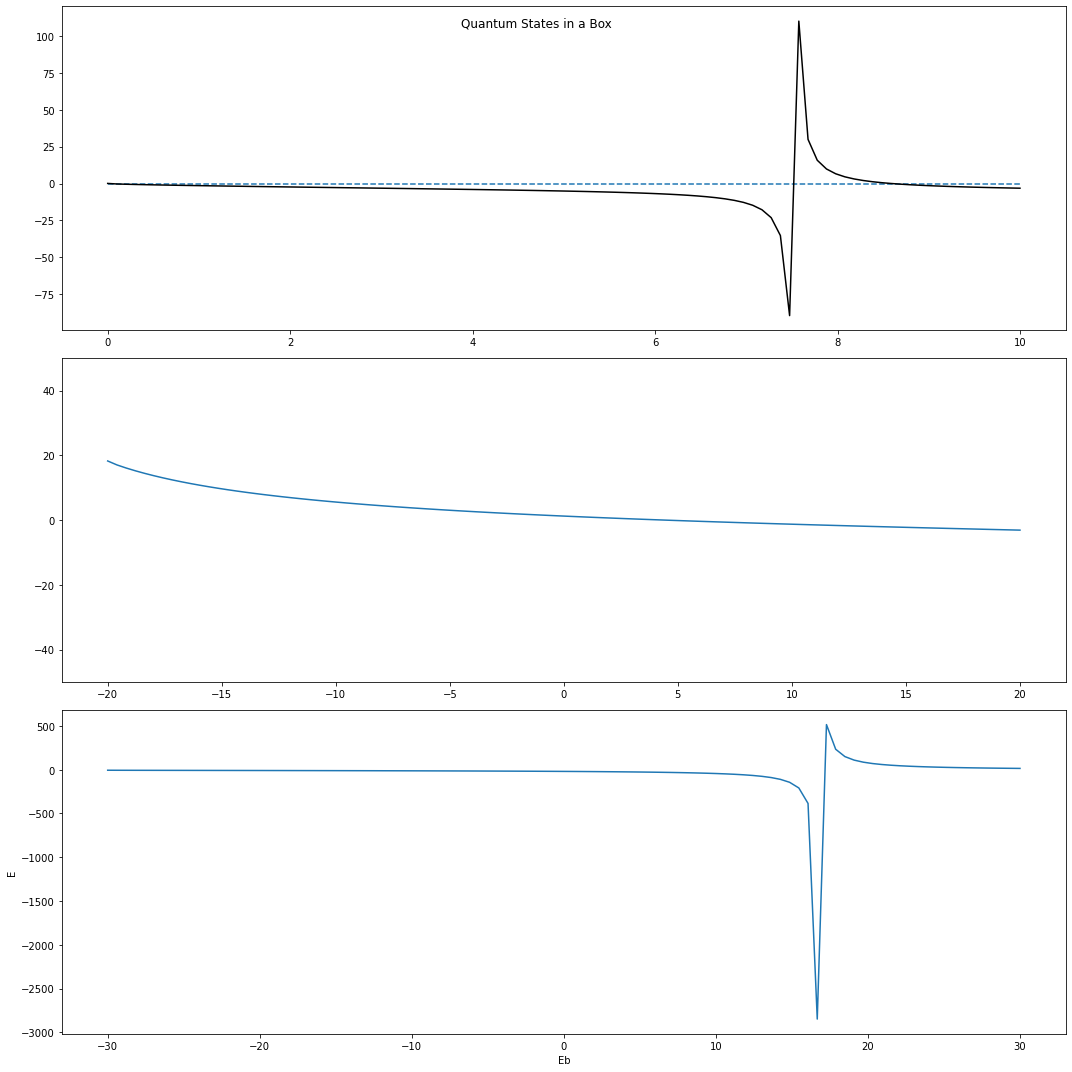

In [16]:
import numpy as np 
import matplotlib.pyplot as plt

x= np.linspace(0,10,100)
y = np.sqrt(10-x)*np.tan(np.sqrt(10-x))-np.sqrt(x)
y2=0*x
figs,(axs1,axs2,ax3)=plt.subplots(3,figsize=(15,15))
axs1.plot(x,y2,'--')

plt.suptitle('Quantum States in a Box')
plt.ylabel('E')
plt.xlabel('Eb')
axs1.plot(x,y,color='black')
y2=np.sqrt(20-x)*np.tan(np.sqrt(20-x))-np.sqrt(x)
x2=np.linspace(-20,20,100)
axs2.plot(x2,y2)
axs2.set_ylim(-50,50)
y3=np.sqrt(30-x)*np.tan(np.sqrt(30-x))-np.sqrt(x)
x3=np.linspace(-30,30,100)
ax3.plot(x3,y3)
figs.tight_layout()

###   Implementation 1: Bisection Algorithm<a id="7.2.1"></a>

1.  The first step in implementing any search algorithm is to get an
    idea of what your function looks like. Assume *V*<sub>0</sub> = 10. For the present problem you
    do this by making a plot of $f(E)=\sqrt{10 -
    E_B} \tan(\sqrt{10-E_B}) -\sqrt{E_B}$ <span>*versus*</span>
    *E*<sub>*B*</sub>. Note from your plot some approximate values at
    which *f*(*E*<sub>*B*</sub>)=0. Your program should be able to find
    more exact values for these zeros.

2.  Write a program that implements the bisection algorithm and use it
    to find some solutions of (7.2).

3.  *Warning:* Because the tan function has singularities, you have to
    be careful. In fact, your graphics program (or Maple) may not
    function accurately near these singularities. One cure is to use a
    different but equivalent form of the equation. Show that an
    equivalent form of (7.2) is

    $$\tag*{7.6}
        \sqrt{E} \cot(\sqrt{10-E}) - \sqrt{10-E} =0.$$

4.  Make a second plot of (7.6), which also has singularities but at
    different places. Choose some approximate locations for zeros from
    this plot.

5.  Evaluate *f*(*E*<sub>*B*</sub>) and thus determine directly the
    precision of your solution.

6.  Compare the roots you find with those given by <span>Maple</span> or
    <span>Mathematica</span>.

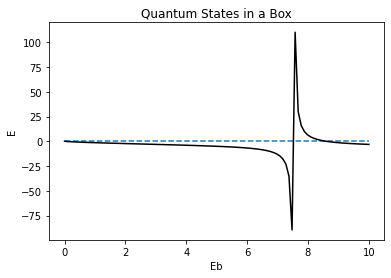

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

x= np.linspace(0,10,100)
y = np.sqrt(10-x)*np.tan(np.sqrt(10-x))-np.sqrt(x)
y2=0*x
plt.plot(x,y2,'--')

plt.title('Quantum States in a Box')
plt.ylabel('E')
plt.xlabel('Eb')
plt.plot(x,y,color='black')

In [21]:
# Bisection.py, Notebook Version

from __future__ import  print_function
from numpy import *

def f(x):                                      # Function
    return np.sqrt(10-x)*np.tan(np.sqrt(10-x))-np.sqrt(x)

def bisection(xminus,xplus,Nmax,eps):          # x-,x+ Nmax error
    for it in range(0,Nmax):
        x=(xminus+xplus)/2                     # Mid point
        print("it ",it, " x ", x, " f(x) ",f(x))
        if (f(xplus)*f(x))>0:                      # Root in other half
            xplus=x                            # Change x+ to x
        else:
            xminus=x                           # Change x- to x
        if(xplus-xminus<eps):                           # Converged?
            print("\n root found with precision eps = ",eps)
            break
        if it==Nmax-1:
             print("\n root not found after Nmax iterations ")   
    return x  

eps=1e-12
a=0.0
b=7.0
Nmax=200
root=bisection(a,b,Nmax,eps)
print("Root =",root)

it  0  x  3.5  f(x)  -3.5855691248432855
it  1  x  1.75  f(x)  -2.1156737235772107
it  2  x  0.875  f(x)  -1.3022032625862214
it  3  x  0.4375  f(x)  -0.8138999413416141
it  4  x  0.21875  f(x)  -0.511787977011004
it  5  x  0.109375  f(x)  -0.32020298489470095
it  6  x  0.0546875  f(x)  -0.1959253927211097
it  7  x  0.02734375  f(x)  -0.11369512163479567
it  8  x  0.013671875  f(x)  -0.05838669398216703
it  9  x  0.0068359375  f(x)  -0.020699799888626483
it  10  x  0.00341796875  f(x)  0.0052369363093082225
it  11  x  0.005126953125  f(x)  -0.008762655357620955
it  12  x  0.0042724609375  f(x)  -0.002093863378725677
it  13  x  0.00384521484375  f(x)  0.0014754681738894451
it  14  x  0.004058837890625  f(x)  -0.00033127727239469495
it  15  x  0.0039520263671875  f(x)  0.0005663539193895284
it  16  x  0.00400543212890625  f(x)  0.0001161317946357654
it  17  x  0.004032135009765625  f(x)  -0.00010792086937887191
it  18  x  0.0040187835693359375  f(x)  4.017996835692372e-06
it  19  x  0.00

In [2]:
# Bisection.py, Notebook Version

from __future__ import  print_function
from numpy import *

def f(x):                                      # Function
    return np.sqrt(10-x)*np.tan(np.sqrt(10-x))-np.sqrt(x)

def bisection(xminus,xplus,Nmax,eps):          # x-,x+ Nmax error
    for it in range(0,Nmax):
        x=(xminus+xplus)/2                     # Mid point
        print("it ",it, " x ", x, " f(x) ",f(x))
        if (f(xplus)*f(x))>0:                      # Root in other half
            xplus=x                            # Change x+ to x
        else:
            xminus=x                           # Change x- to x
        if(xplus-xminus<eps):                           # Converged?
            print("\n root found with precision eps = ",eps)
            break
        if it==Nmax-1:
             print("\n root not found after Nmax iterations ")   
    return x  

eps=1e-12
a=7.0
b=8.0
Nmax=200
root=bisection(a,b,Nmax,eps)
print("Root =",root)

#if you change your starting parameters you get other solution

it  0  x  7.5  f(x)  -155.61093090054877
it  1  x  7.75  f(x)  18.368247739342568
it  2  x  7.625  f(x)  49.12494903332376
it  3  x  7.5625  f(x)  160.7809863288343
it  4  x  7.53125  f(x)  -3662.6347055233045
it  5  x  7.546875  f(x)  341.4185236798073
it  6  x  7.5390625  f(x)  759.2286311042157
it  7  x  7.53515625  f(x)  1925.4088184710704
it  8  x  7.533203125  f(x)  8162.911435906479
it  9  x  7.5322265625  f(x)  -13257.827005778176
it  10  x  7.53271484375  f(x)  42557.69262160947
it  11  x  7.532470703125  f(x)  -38498.2614943008
it  12  x  7.5325927734375  f(x)  -805516.5646524609
it  13  x  7.53265380859375  f(x)  89868.34890091092
it  14  x  7.532623291015625  f(x)  202313.9851082968
it  15  x  7.5326080322265625  f(x)  540351.9332389864
it  16  x  7.532600402832031  f(x)  3283069.303568512
it  17  x  7.532596588134766  f(x)  -2134810.1662744065
it  18  x  7.532598495483398  f(x)  -12207480.42811603
it  19  x  7.532599449157715  f(x)  8981670.788513979
it  20  x  7.532598972

<ipython-input-13-2059bdbfa14c>:5: RuntimeWarning: divide by zero encountered in true_divide
  y=np.sqrt(x)*(1/np.tan(np.sqrt(10-x)))-np.sqrt(10-x)


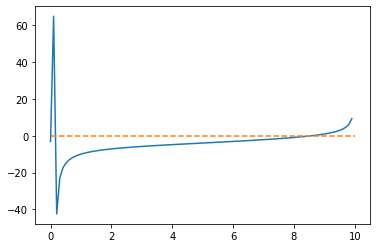

In [13]:
import matplotlib.pyplot as plt
import numpy as np 

x=np.linspace(0,10,100)
y=np.sqrt(x)*(1/np.tan(np.sqrt(10-x)))-np.sqrt(10-x)
y2=0*x
plt.plot(x,y)
plt.plot(x,y2,'--')
        

In [15]:
# Bisection.py, Notebook Version

from __future__ import  print_function
from numpy import *

def f(x):                                      # Function
    return np.sqrt(x)*(1/np.tan(np.sqrt(10-x)))-np.sqrt(10-x)

def bisection(xminus,xplus,Nmax,eps):          # x-,x+ Nmax error
    for it in range(0,Nmax):
        x=(xminus+xplus)/2                     # Mid point
        print("it ",it, " x ", x, " f(x) ",f(x))
        if (f(xplus)*f(x))>0:                      # Root in other half
            xplus=x                            # Change x+ to x
        else:
            xminus=x                           # Change x- to x
        if(xplus-xminus<eps):                           # Converged?
            print("\n root found with precision eps = ",eps)
            break
        if it==Nmax-1:
             print("\n root not found after Nmax iterations ")   
    return x  

eps=1e-12
a=0
b=7
Nmax=200
root=bisection(a,b,Nmax,eps)
print("Root =",root)

#if you change your starting parameters you get other solution

it  0  x  3.5  f(x)  -5.331094607533167
it  1  x  1.75  f(x)  -7.665016310329298
it  2  x  0.875  f(x)  -10.724548375799056
it  3  x  0.4375  f(x)  -16.50801311291555
it  4  x  0.21875  f(x)  -36.310961998650384
it  5  x  0.109375  f(x)  95.7612043340577
it  6  x  0.1640625  f(x)  -78.66395191220244
it  7  x  0.13671875  f(x)  -370.4995364882059
it  8  x  0.123046875  f(x)  296.83140262580037
it  9  x  0.1298828125  f(x)  4412.815399507831
it  10  x  0.13330078125  f(x)  -792.7114714551558
it  11  x  0.131591796875  f(x)  -1908.5058303729231
it  12  x  0.1307373046875  f(x)  -6651.6396756426875
it  13  x  0.13031005859375  f(x)  26512.303664487958
it  14  x  0.130523681640625  f(x)  -17725.949926777103
it  15  x  0.1304168701171875  f(x)  -106676.11390077215
it  16  x  0.13036346435546875  f(x)  70593.79820738062
it  17  x  0.13039016723632812  f(x)  417700.85229137447
it  18  x  0.1304035186767578  f(x)  -286494.8649552713
it  19  x  0.13039684295654297  f(x)  -1823802.203750375
it  2

##  Improved Algorithm: Newton-Raphson Searching<a id="7.3"></a>

The Newton-Raphson algorithm finds approximate roots of the equation

$$\tag*{7.7}
    f(x) =0$$

more quickly than the bisection method. As we see graphically in Figure 7.1, this
algorithm is the equivalent of drawing a straight line *f*(*x*)≃*mx* + *b*
tangent to the curve at an *x* value for which *f*(*x*)≃0 and then using the
intercept of the line with the *x* axis at *x* = −*b*/*m* as an improved guess
for the root. If the “curve” were a straight line, the answer would be exact;
otherwise, it is a good approximation if the guess is close enough to the root for
*f*(*x*) to be nearly linear. The process continues until some set level of
precision is reached. If a guess is in a region where *f*(*x*) is nearly linear
(Figure 7.1), then the convergence is much more rapid than for the bisection
algorithm.

The analytic formulation of the Newton-Raphson algorithm starts with an old
guess *x*<sub>0</sub> and expresses a new guess *x* as a correction *Δx* to
the old guess:[[xml]](http://physics.oregonstate.edu/~rubin/Books/CPbook/eBook/xml/7.8.xml)

$$\begin{align}
\tag*{7.8}
  x_0 & =  \mbox{old guess},\quad
  \Delta x = \mbox{unknown correction} \\
    \Rightarrow\quad x & =  x_0 + \Delta x = \mbox{(unknown) new guess}.\tag*{7.9}
   \end{align}$$

We next expand the known function *f*(*x*) in a Taylor series around
*x*<sub>0</sub> and keep only the linear terms:

$$\tag*{7.10} f(x = x_0 + \Delta x) \simeq f(x_0) + \left. \frac{d f}
{dx}\right|_{x_0} \Delta x.$$

We then determine the correction *Δx* by calculating the point at which this
linear approximation to *f*(*x*) crosses the *x* axis:

$$\begin{align}
\tag*{7.11}
  f(x_0) + \left. \frac{d f} {dx}\right|_{x_0} \Delta x  & = 0 ,\\
 \Rightarrow  \quad   \Delta x & = - \frac{f(x_0)} {  \left. {df /
    dx}\right|_{x_0}}.  \tag*{7.12}\end{align}$$

The procedure is repeated starting at the improved *x* until some set
level of precision is obtained.

![image](Figs/Fig7_2.png)

**Figure 7.2** A graphical representation of the steps involved in solving for a
zero of *fx* using the Newton-Raphson method. The Newton-Raphson method
takes the new guess as the zero of the line tangent to *fx* at the old guess. Two
guesses are shown.

The Newton-Raphson algorithm (7.12) requires evaluation of the derivative
*df*/*dx* at each value of *x*<sub>0</sub>. In many cases you may have an
analytic expression for the derivative and can build it into the algorithm.
However, especially for more complicated problems, it is simpler and less
error-prone to use a numerical forward-difference approximation to the
derivative:\[*Note:* We discuss numerical differentiation in
[Chapter 5.](CP05.ipynb)\]

$$\tag*{7.13}
\frac{d f} {d x} \simeq \frac{f (x + \delta x) - f (x)}{\delta x},$$

where *δx* is some small change in *x* that you just chose \[different from the
*Δ* used for searching in (7.12)\]. While a central-difference approximation for
the derivative would be more accurate, it would require additional evaluations
of the *f*’s, and once you find a zero, it does not matter how you got there. In
Listing 7.2 we give a program `NewtonCD.py` that implement the search with
the central difference derivative.

[**Listing 7.2  NewtonCD.py**](http://www.science.oregonstate.edu/~rubin/Books/CPbook/Codes/PythonCodes/NewtonCD.py) uses the Newton-Raphson method to search for
a zero of the function *fx*. A central-difference approximation is used to
determine *df*/*dx*.

![image](Figs/Fig7_3.png)

 **Figure 7.3** Two examples of how the
Newton-Raphson algorithm may fail if the initial guess is not in the
region where *fx* can be approximated by a straight line. *Top:* A guess
lands at a local minimum/maximum, that is, a place where the derivative
vanishes, and so the next guess ends up at *x* = ∞. *Bottom:* The search
has fallen into an infinite loop. The technique know as “backtracking”
could eliminate this problem.

In [7]:
# NewtonCD.py, Notebook Version,  Newton search with central difference

# from __future__ import  print_function
from numpy import *

x = 2.;         dx = 1e-2;        eps = 1e-6;                            # Parameters
imax = 100;                                                    # Max no of iterations
def f(x):                                                              # function def
    return 2*cos(x) - x
def Newton(x,dx,eps):
    for it in range( 0, imax + 1):
        F = f(x)
        if ( abs(F) <= eps ):                                     # Check for convergence
            print("Root found, tolerance eps = " , eps) 
            break
        print("Iteration # = ", it, " x = ", x, " f(x) = ", F)
        df = ( f(x + dx/2)  -  f(x - dx/2) )/dx                      # Central diff deriv
        dx = - F/df 
        x   += dx      
    return x   
root=Newton(x,dx,eps)
print("Root =",root)

Iteration # =  0  x =  2.0  f(x) =  -2.8322936730942847
Iteration # =  1  x =  0.995137139435808  f(x) =  0.09363857545513143
Iteration # =  2  x =  1.0310419345637714  f(x) =  -0.0031913020987734964
Root found, tolerance eps =  1e-06
Root = 1.0298667510695763


### 7.3.1  Newton-Raphson with Backtracking<a id="7.3.1"></a>

Two examples of possible problems with the Newton-Raphson algorithm are
shown in Figure 7.3. On the left we see a case where the search takes us to an
*x* value where the function has a local minimum or maximum, that is, where
*df*/*dx* = 0. Because *Δx* = −*f*/*f*′, this leads to a horizontal tangent
(division by zero), and so the next guess is *x* = ∞, from where it is hard to
return. When this happens, you need to start your search with a different guess
and pray that you do not fall into this trap again. In cases where the correction
is very large but maybe not infinite, you may want to try backtracking (described
below) and hope that by taking a smaller step you will not get into as much
trouble.

In Figure 7.3 on the right we see a case where a search falls into an infinite loop
surrounding the zero without ever getting there. A solution to this problem is
also called *backtracking*. As the name implies, in cases where the new guess
*x*<sub>0</sub> + *Δx* leads to an increase in the magnitude of the function,
|*f*(*x*<sub>0</sub> + *Δx*)|<sup>2</sup> &gt; |*f*(*x*<sub>0</sub>)|<sup>2</sup>,
you can backtrack somewhat and try a smaller guess, say,
*x*<sub>0</sub> + *Δx*/2. If the magnitude of *f* still increases, then you just
need to backtrack some more, say, by trying *x*<sub>0</sub> + *Δx*/4 as your
next guess, and so forth. Because you know that the tangent line leads to a local
decrease in |*f*|, eventually an acceptable small enough step should be found.

The problem in both these cases is that the initial guesses were not
close enough to the regions where *f*(*x*) is approximately linear. So
again, a good plot may help produce a good first guess. Alternatively,
you may want to start your search with the bisection algorithm and then
switch to the faster Newton-Raphson algorithm when you get closer to the
zero.

###   Implementation: Newton-Raphson Algorithm<a id="7.3.2"></a>

1.  Use the Newton-Raphson algorithm to find some energies
    *E*<sub>*B*</sub> that are solutions of (7.2). Compare these
    solutions to the ones found with the bisection algorithm.

2.  Again, notice that the 10 in (7.2) is proportional to the strength
    of the potential that causes the binding. See if making the
    potential deeper, say, by changing the 10 to a 20 or a 30, produces
    more or deeper bound states. (Note that in contrast to the bisection
    algorithm, your initial guess must be closer to the answer for the
    Newton-Raphson algorithm to work.)

3.  Modify your algorithm to include backtracking and then try it out on
    some difficult cases.

4.  Evaluate *f*(*E*<sub>*B*</sub>) and thus determine directly the
    precision of your solution.


In [4]:
import numpy as np

x = 7;         dx = 1e-2;        eps = 1e-6;                            # Parameters
imax = 100;                                                    # Max no of iterations
def f(x):                                                              # function def
    return np.sqrt(10-x)*np.tan(np.sqrt(10-x))-np.sqrt(x)
def Newton(x,dx,eps):
    for it in range( 0, imax + 1):
        F = f(x)
        if ( abs(F) <= eps ):                                     # Check for convergence
            print("Root found, tolerance eps = " , eps) 
            break
        print("Iteration # = ", it, " x = ", x, " f(x) = ", F)
        df = ( f(x + dx/2)  -  f(x - dx/2) )/dx                      # Central diff deriv
        dx = - F/df 
        x   += dx      
    return x   
root=Newton(x,dx,eps)
print("Root =",root)

Iteration # =  0  x =  7  f(x) =  -13.293591085912809
Iteration # =  1  x =  6.253670407694472  f(x) =  -7.569823471575341
Iteration # =  2  x =  4.2262634791981855  f(x) =  -4.244236135306007
Iteration # =  3  x =  0.05592915972121748  f(x) =  -0.19918853913352857
Iteration # =  4  x =  nan  f(x) =  nan
Iteration # =  5  x =  nan  f(x) =  nan
Iteration # =  6  x =  nan  f(x) =  nan
Iteration # =  7  x =  nan  f(x) =  nan
Iteration # =  8  x =  nan  f(x) =  nan
Iteration # =  9  x =  nan  f(x) =  nan
Iteration # =  10  x =  nan  f(x) =  nan
Iteration # =  11  x =  nan  f(x) =  nan
Iteration # =  12  x =  nan  f(x) =  nan
Iteration # =  13  x =  nan  f(x) =  nan
Iteration # =  14  x =  nan  f(x) =  nan
Iteration # =  15  x =  nan  f(x) =  nan
Iteration # =  16  x =  nan  f(x) =  nan
Iteration # =  17  x =  nan  f(x) =  nan
Iteration # =  18  x =  nan  f(x) =  nan
Iteration # =  19  x =  nan  f(x) =  nan
Iteration # =  20  x =  nan  f(x) =  nan
Iteration # =  21  x =  nan  f(x) =  nan
It

<ipython-input-4-5fcf63a6b275>:6: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(10-x)*np.tan(np.sqrt(10-x))-np.sqrt(x)


In [5]:
import numpy as np

x = 7;         dx = 1e-2;        eps = 1e-6;                            # Parameters
imax = 100;                                                    # Max no of iterations
def f(x):                                                              # function def
    return np.sqrt(20-x)*np.tan(np.sqrt(20-x))-np.sqrt(x)
def Newton(x,dx,eps):
    for it in range( 0, imax + 1):
        F = f(x)
        if ( abs(F) <= eps ):                                     # Check for convergence
            print("Root found, tolerance eps = " , eps) 
            break
        print("Iteration # = ", it, " x = ", x, " f(x) = ", F)
        df = ( f(x + dx/2)  -  f(x - dx/2) )/dx                      # Central diff deriv
        dx = - F/df 
        x   += dx      
    return x   
root=Newton(x,dx,eps)
print("Root =",root)

Iteration # =  0  x =  7  f(x) =  -0.841573739199692
Iteration # =  1  x =  6.047528421079539  f(x) =  0.061929589317159195
Iteration # =  2  x =  6.108015759844951  f(x) =  0.0004562949283286599
Root found, tolerance eps =  1e-06
Root = 6.10846699649765
